In [3]:
import pandas as pd
#import plotly.express as px
import sqlite3

adcc = pd.read_csv('adcc_historical_data.csv', delimiter=';')
adcc.head()


,match_id,winner_id,winner_name,loser_id,loser_name,win_type,submission,winner_points,loser_points,adv_pen,weight_class,sex,stage,year
0,3314,484,Murilo Santana,733,Vinicius Magalhaes,DECISION,NaN,-1,-1,NaN,ABS,M,4F,2011
1,35049,7507,Nicholas Meregali,9554,Henrique Cardoso,SUBMISSION,Kimura,-1,-1,NaN,99KG,M,R1,2022
2,35053,7507,Nicholas Meregali,1740,Yuri Simoes,DECISION,NaN,-1,-1,NaN,99KG,M,4F,2022
3,35057,7507,Nicholas Meregali,576,Rafael Lovato Jr,POINTS,NaN,0,0,PEN,99KG,M,3RD,2022
4,35096,7507,Nicholas Meregali,11797,Giancarlo Bodoni,POINTS,NaN,6,2,NaN,ABS,M,4F,2022


In [4]:
adcc.shape

(1028, 14)

In [5]:
adcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   match_id       1028 non-null   int64 
 1   winner_id      1028 non-null   int64 
 2   winner_name    1028 non-null   object
 3   loser_id       1028 non-null   int64 
 4   loser_name     1028 non-null   object
 5   win_type       1028 non-null   object
 6   submission     400 non-null    object
 7   winner_points  1028 non-null   int64 
 8   loser_points   1028 non-null   int64 
 9   adv_pen        29 non-null     object
 10  weight_class   1028 non-null   object
 11  sex            1028 non-null   object
 12  stage          1028 non-null   object
 13  year           1028 non-null   int64 
dtypes: int64(6), object(8)
memory usage: 112.6+ KB


In [6]:
adcc.describe()

,match_id,winner_id,loser_id,winner_points,loser_points,year
count,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000
mean,9190.565175,2487.659533,2944.011673,0.807393,-0.590467,2010.874514
std,11085.517307,3489.950628,3572.119124,3.123530,0.674033,7.369033
min,140.000000,-1.000000,-1.000000,-1.000000,-1.000000,1998.000000
25%,1173.500000,195.000000,-1.000000,-1.000000,-1.000000,2005.000000
50%,3304.500000,644.000000,939.000000,-1.000000,-1.000000,2011.000000
75%,13904.250000,3009.000000,5463.000000,2.000000,0.000000,2017.000000
max,35103.000000,12922.000000,13095.000000,22.000000,6.000000,2022.000000


In [7]:
adcc['submission'].value_counts(dropna=False)

submission
NaN                  628
RNC                   99
Armbar                68
Guillotine            34
Heel hook             32
Triangle              24
Footlock              18
Kneebar               17
Kimura                13
Choke                 11
Inside heel hook      11
Submission            10
Toe hold              10
Outside heel hook      9
Katagatame             7
D'arce choke           6
Short choke            4
Americana              3
Verbal tap             3
North south choke      3
Omoplata               3
Leg lock               2
Calf slicer            2
Headlock               2
Estima lock            1
Cross face             1
Ezekiel                1
Shoulder lock          1
Dogbar                 1
Anaconda               1
Z Lock                 1
Wristlock              1
Twister                1
Name: count, dtype: int64

In [8]:
#creating dataframe just for wins related to submissions

sub_wins_adcc = adcc[adcc['win_type'] == 'SUBMISSION'].copy()
sub_wins_adcc['submission'].value_counts()

submission
RNC                  99
Armbar               68
Guillotine           34
Heel hook            32
Triangle             24
Footlock             18
Kneebar              17
Kimura               13
Inside heel hook     11
Choke                11
Toe hold             10
Submission           10
Outside heel hook     9
Katagatame            7
D'arce choke          6
Short choke           4
Verbal tap            3
North south choke     3
Americana             3
Omoplata              3
Leg lock              2
Headlock              2
Calf slicer           2
Wristlock             1
Z Lock                1
Anaconda              1
Shoulder lock         1
Dogbar                1
Estima lock           1
Ezekiel               1
Cross face            1
Twister               1
Name: count, dtype: int64

/var/folders/8d/xzv5r4pd40zg3qx4p788zpz80000gn/T/ipykernel_17867/2213470336.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_subs.index, y=top_subs.values, palette='viridis')


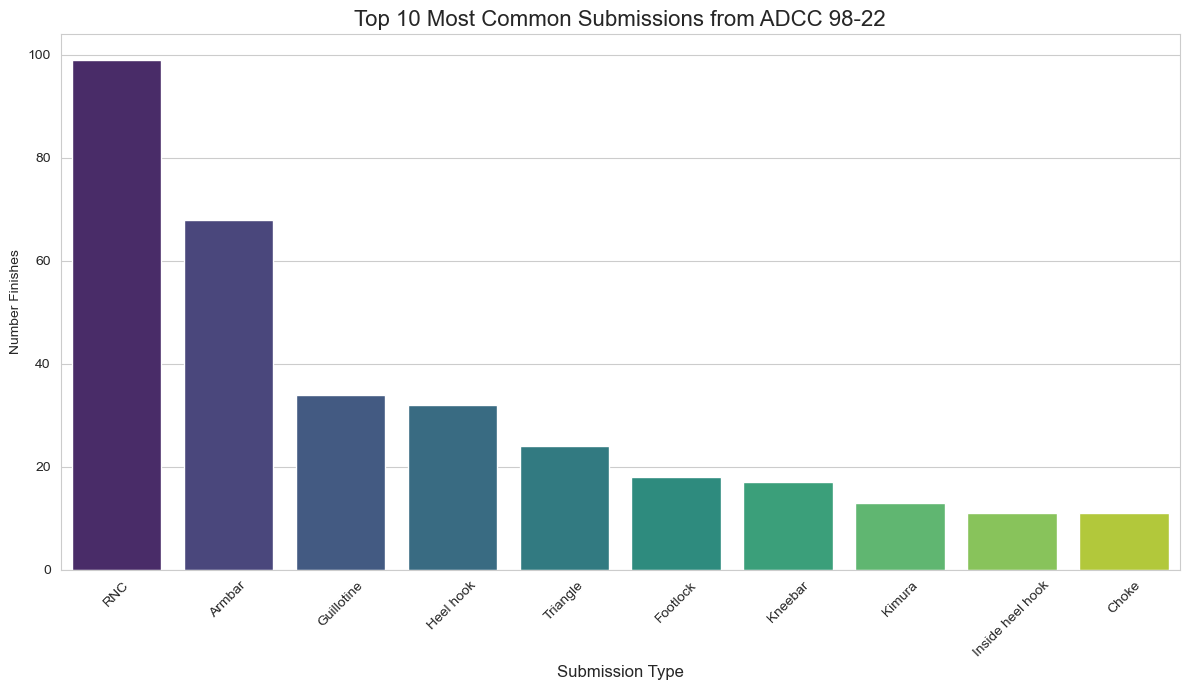

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt 

#Bar chart breaking down top 10 submission from ADCC 98-22
top_subs = sub_wins_adcc['submission'].value_counts().head(10)
plt.figure(figsize=(12,7))

sns.set_style('whitegrid')
sns.barplot(x=top_subs.index, y=top_subs.values, palette='viridis')
plt.title('Top 10 Most Common Submissions from ADCC 98-22', fontsize=16)
plt.xlabel('Submission Type', fontsize=12)
plt.ylabel('Number Finishes')
plt.xticks(rotation=45)
plt.tight_layout()

In [16]:
def categoriza_sub(submission):
    sub_lower = str(submission).lower()
    #Submissions categorized by Type
    choke_bool = {'choke', 'rnc', 'guillotine', 'triangle', 'katagatame', 'headlock', 'anaconda', 'ezekiel', 'gogoplata'}
    leg_lock_bool = {'heel hook', 'kneebar', 'footlock', 'z lock', 'estima', 'leg lock', 'toe', 'dogbar'}
    arm_lock_bool = {'armbar', 'kimura', 'shoulder', 'americana', 'plata', 'wrist'}
    if any(x in sub_lower for x in choke_bool):
        return 'Choke'
    elif any(x in sub_lower for x in leg_lock_bool):
        return 'Leg Lock'
    elif any(x in sub_lower for x in arm_lock_bool):
        return 'Arm/Shoulder Lock'
    else:
        return 'Other'

sub_wins_adcc['submission_type'] = sub_wins_adcc['submission'].apply(categoriza_sub)
sub_wins_adcc[['submission', 'submission_type']].head(15)

,submission,submission_type
1,Kimura,Arm/Shoulder Lock
31,Armbar,Arm/Shoulder Lock
40,RNC,Choke
42,RNC,Choke
48,Armbar,Arm/Shoulder Lock
49,RNC,Choke
54,Kimura,Arm/Shoulder Lock
55,Kneebar,Leg Lock
58,Estima lock,Leg Lock
59,Triangle,Choke


(np.float64(-1.099998986224517),
 np.float64(1.0999973925930253),
 np.float64(-1.0999995935389106),
 np.float64(1.09999998064471))

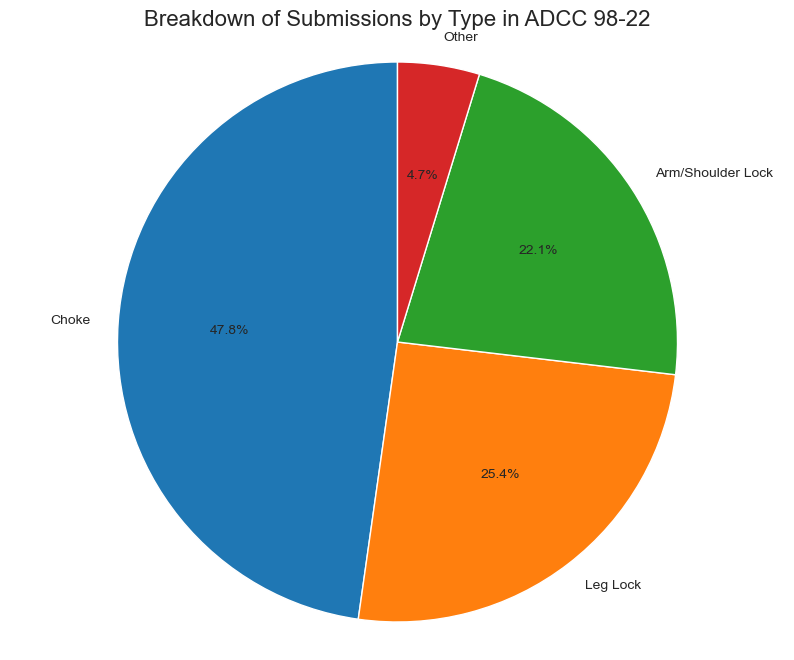

In [ ]:
#Pie Chart showing the breakdown of submissions by type

sub_types = sub_wins_adcc['submission_type'].value_counts()

plt.figure(figsize=(10,8))
plt.pie(sub_types, labels=sub_types.index, autopct='%1.1f%%', startangle=90)
plt.title('Breakdown of Submissions by Type in ADCC 98-22', fontsize=16)

plt.axis('equal')

In [17]:
# Top athletes by total wins
top_wins = adcc['winner_name'].value_counts().head(10)

# Top athletes by submission wins
top_submission_wins = (
    adcc[adcc['win_type'] == 'SUBMISSION']['winner_name']
    .value_counts()
    .head(10)
)

top_wins, top_submission_wins

(winner_name
 Alexandre Ribeiro     30
 Marcelo Garcia        27
 Saulo Ribeiro         22
 Andre Galvao          22
 Leonardo Vieira       21
 Fabricio Werdum       20
 Gordon Ryan           20
 Roberto Abreu         20
 Vinicius Magalhaes    19
 Pablo Popovitch       19
 Name: count, dtype: int64,
 winner_name
 Marcelo Garcia          23
 Dean Lister             16
 Gordon Ryan             15
 Alexandre Ribeiro       13
 Vinicius Magalhaes      11
 Alexandre de Freitas     9
 Jean Jacques Machado     9
 Baret Yoshida            9
 Roger Gracie             8
 Braulio Estima           8
 Name: count, dtype: int64)

In [18]:

total_matches = len(adcc)
unique_years = adcc['year'].nunique()
total_athletes = pd.unique(adcc[['winner_name', 'loser_name']].values.ravel()).size
win_types = adcc['win_type'].value_counts()
submission_count = adcc['submission'].notna().sum()
unique_submissions = adcc['submission'].nunique()
weight_classes = adcc['weight_class'].value_counts()
sex_counts = adcc['sex'].value_counts()
stages = adcc['stage'].value_counts()

{
    'Total Matches': total_matches,
    'Years Covered': unique_years,
    'Unique Athletes': total_athletes,
    'Win Types': win_types,
    'Submission Matches': submission_count,
    'Unique Submission Types': unique_submissions,
    'Weight Class Distribution': weight_classes,
    'Sex Distribution': sex_counts,
    'Stage Distribution': stages
}

{'Total Matches': 1028,
 'Years Covered': 14,
 'Unique Athletes': 614,
 'Win Types': win_type
 POINTS              520
 SUBMISSION          402
 DECISION             97
 INJURY                8
 DESQUALIFICATION      1
 Name: count, dtype: int64,
 'Submission Matches': np.int64(400),
 'Unique Submission Types': 32,
 'Weight Class Distribution': weight_class
 ABS      189
 66KG     172
 77KG     170
 88KG     169
 99KG     149
 +99KG    137
 +60KG     22
 60KG      20
 Name: count, dtype: int64,
 'Sex Distribution': sex
 M    986
 F     42
 Name: count, dtype: int64,
 'Stage Distribution': stage
 R1      367
 4F      281
 SF      165
 F        86
 E1       45
 3PLC     33
 3RD      27
 SPF      15
 8F        8
 R2        1
 Name: count, dtype: int64}